In [13]:
import numpy as np
from timeit import timeit
import matplotlib.pyplot as plt

In [14]:
def dot(A_arr, B_arr):
    
    """
    Takes two vectors (array-like) and returns thier dot product.
    Uses only base python.
    """
    
    dot_product = 0
    
    for a, b in zip(A_arr, B_arr):
        dot_product += a * b
    
    return dot_product

In [15]:
def time_function(func, *args, reps=10):
    
    """
    Passes *args into a function, func, and times it reps times, returns the average time in milliseconds (ms).
    """
    
    avg_time = timeit(lambda: func(*args), number=reps) / reps
    
    return avg_time * 1000

In [64]:
def time_func2(
    func,
    vector_length,
    input_type = "array",
    data_reps = 10,
    reps = 10
):
    
    """
    Takes func, a function that perfroms a calculation on two vectors (array-lines) and   
    returns the times (in ms) the function takes to run on std. normal generated vectors.
    
    Arguments:
    ----------
    func (function): a function that perfroms a calculation on two vectors (array-lines)
    vector_length (int): the length that the radom vectors should be
    input_type (str): Vontrols the data type of the random vector. Takes values \"list\" or \"array\"
    data_reps (int): the number of times to generate the data
    reps (int): the number of time to run the timer for each data set
    """
    
    
    total_time = 0
    
    for i in range(0, data_reps):
        
        A = np.random.standard_normal(vector_length)
        B = np.random.standard_normal(vector_length)
        if func==lr:
            X = np.column_stack((np.ones(len(A),dtype=int),A))
            y = B
        
#         if input_type == "list":
#             A = list(A)
#             B = list(B)
            
#         inst_time = time_function(func, A, B, reps=reps)
        try:
            inst_time = time_function(func, X, y, reps=reps)
        except:            
            return print("ERROR:vector length must be greater than 1 AND Must have enough RAM to allocate matrices of size (n x n)")
        total_time += inst_time
    
    avg_time = total_time / data_reps
    
    return avg_time

In [61]:
def lr(X,y):
    b = np.linalg.inv( X.T @ X ) @ X.T @ y
    return b, X @ b #returns b,yhat

<hr style="border:solid 1px">

In [18]:
# create the vectors

# create the vectors as numpy arrays
A_arr = np.random.randn(10**3)
B_arr = np.random.randn(10**3)

# copy the vectors as lists
A_list = list(A_arr)
B_list = list(B_arr)

<hr style="border:solid 1px">

In [19]:
# create an array of increasing times

ord_mag = 6
lengths = [10 ** n for n in range(0, ord_mag + 1)]

In [20]:
# time the loop-based function
# use list as inputs

loop_list_times = [time_func2(dot, e, "list") for e in lengths]
loop_list_times

ERROR:vector length must be greater than 1 AND Must have enough RAM to allocate matrices of size (n x n)
ERROR:vector length must be greater than 1 AND Must have enough RAM to allocate matrices of size (n x n)
ERROR:vector length must be greater than 1 AND Must have enough RAM to allocate matrices of size (n x n)
ERROR:vector length must be greater than 1 AND Must have enough RAM to allocate matrices of size (n x n)
ERROR:vector length must be greater than 1 AND Must have enough RAM to allocate matrices of size (n x n)
ERROR:vector length must be greater than 1 AND Must have enough RAM to allocate matrices of size (n x n)
ERROR:vector length must be greater than 1 AND Must have enough RAM to allocate matrices of size (n x n)


[None, None, None, None, None, None, None]

In [8]:
# time the loop-based function
# use list as inputs

loop_array_times = [time_func2(dot, length, "array") for length in lengths]
loop_array_times

[0.002126969920936972,
 0.006631219875998795,
 0.05142188019817695,
 0.4281762201571837,
 3.370406289177481,
 33.87435117998393,
 328.8083392599947]

In [9]:
# time numpy

np_times = [time_func2(np.dot, length) for length in lengths]
np_times

[0.012665099930018187,
 0.0033778694341890514,
 0.002895450161304325,
 0.0020629502250812948,
 0.005723939393647015,
 0.026674140244722366,
 1.3893447601003572]

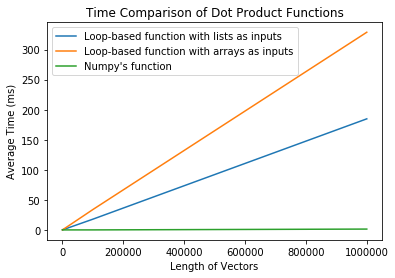

In [10]:
# plot numpy time v.s. loop time

plt.plot(lengths, loop_list_times, label = "Loop-based function with lists as inputs")
plt.plot(lengths, loop_array_times, label = "Loop-based function with arrays as inputs")
plt.plot(lengths, np_times, label = "Numpy's function")
plt.title("Time Comparison of Dot Product Functions")
plt.xlabel("Length of Vectors")
plt.ylabel("Average Time (ms)")
plt.legend()
plt.show()

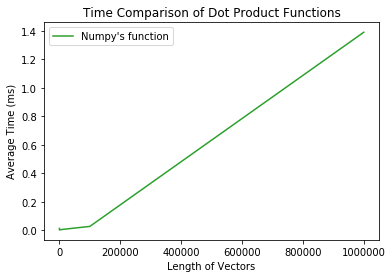

In [11]:
plt.plot(lengths, np_times, label = "Numpy's function", c = "C2")
plt.title("Time Comparison of Dot Product Functions")
plt.xlabel("Length of Vectors")
plt.ylabel("Average Time (ms)")
plt.legend()
plt.show()

<hr style="border:solid 1px">

In [62]:
# create an array of increasing times

ord_mag = 6
# lengths = [10 ** n for n in range(0, ord_mag + 1)]
lengths = [1+10 ** n for n in range(0, ord_mag + 1)] #all vector lengths must be greater than 1

In [63]:
lengths

[2, 11, 101, 1001, 10001, 100001, 1000001]

##### Direct Numpy Method

In [65]:
# time the function

loop_array_times = [time_func2(lr, length, "array") for length in lengths]
loop_array_times

[0.04502129042521119,
 0.030040760175324976,
 0.033855369547382,
 0.03224913001758978,
 0.3933348404825665,
 1.2221182603389025,
 21.06056908989558]

The error I get above is because the dot product example uses arrays of length $10^5$ and $10^6$, but when calculating yhat (calculating b works fine), it generates an (n x n) matrix that the dot product will be taken of it with y to get an array of yhat values of size (n). (see unable to allocate error further down)

The problem is,
https://www.google.com/search?channel=fs&client=ubuntu&q=numpy+multiply+arrays+without+holding+in+memory

##### Further Investigation:

In [356]:
A = np.random.standard_normal(100001)
B = np.random.standard_normal(100001)
X = np.column_stack((np.ones(len(A),dtype="float16"),A))
y = B.astype("float16")

a = 10001
display((X[1:a] @ inv(X[1:a].T @ X[1:a])@X[1:a].T ).shape)
print("a of size 10001:",(X[1:a] @ inv(X[1:a].T @ X[1:a])@X[1:a].T ).nbytes/(10**6)," MB") #bytes/10**6=mb

a = 20001
display((X[1:a] @ inv(X[1:a].T @ X[1:a])@X[1:a].T ).shape)
print("a of size 20001:",(X[1:a] @ inv(X[1:a].T @ X[1:a])@X[1:a].T ).nbytes/(10**6)," MB") #bytes/10**6=mb

print("\n memory size increases at O(n^2) where n is vector length")

# a = 100001
print("\n a of size 10**5+1: (X[1:a] @ inv(X[1:a].T @ X[1:a]) @ X[1:a].T @ y[1:a]).shape = 74500, MB")

(10000, 10000)

a of size 10001: 800.0  MB


(20000, 20000)

a of size 20001: 3200.0  MB

 memory size increases at O(n^2) where n is vector length

 a of size 10**5+1: (X[1:a] @ inv(X[1:a].T @ X[1:a]) @ X[1:a].T @ y[1:a]).shape = 74500, MB


In [395]:
print("You can make it take up less memory by changing the data type")
a = 10001
display((X[1:a] @ inv(X[1:a].T @ X[1:a]) @ X[1:a].T @ y[1:a]).nbytes)
display((X[1:a].astype("float32") @ inv(X[1:a].T.astype("float32") @ X[1:a].astype("float32")) @ X[1:a].T.astype("float32") @ y[1:a].astype("float32")).nbytes)

80000

40000

In [396]:
print("But it will still call the allocation at the original datatype float64")
a = 100001
display((X[1:a] @ inv(X[1:a].T @ X[1:a]) @ X[1:a].T @ y[1:a]).nbytes)
display((X[1:a].astype("float32") @ inv(X[1:a].T.astype("float32") @ X[1:a].astype("float32")) @ X[1:a].T.astype("float32") @ y[1:a].astype("float32")).nbytes)

But it will still call the allocation at the original datatype float64


MemoryError: Unable to allocate 74.5 GiB for an array with shape (100000, 100000) and data type float64

<u>HOWEVER</u>: IF WE DECLARE our design matrix X as a np.array instead of an np.matrix, it works!

##### Method 2:

In [209]:
# time method2

# method2_times = [time_func2(function2, length) for length in lengths]
# method2_times

##### Plot Results of timings:

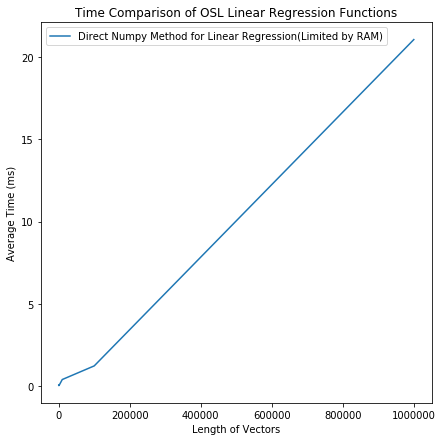

In [66]:
# plot numpy time v.s. loop time

plt.figure(figsize=(7,7))
plt.plot(lengths, loop_array_times, label = "Direct Numpy Method for Linear Regression(Limited by RAM)")
# plt.plot(lengths, np_times, label = "Numpy's function")
plt.title("Time Comparison of OSL Linear Regression Functions")
plt.xlabel("Length of Vectors")
plt.ylabel("Average Time (ms)")
plt.legend()
plt.show()